In [6]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler


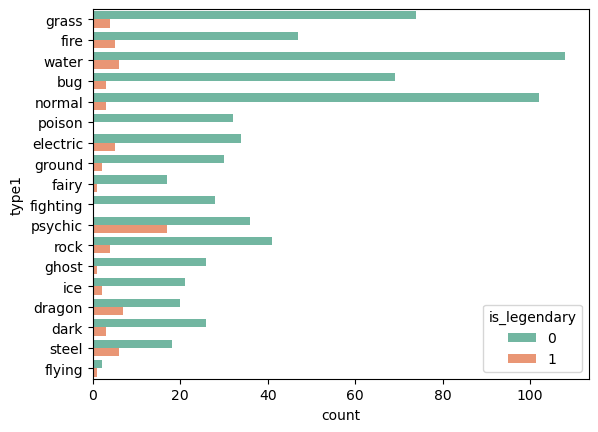

In [8]:
df = pd.read_csv("pokemon.csv")
sns.countplot(data=df, y="type1", hue="is_legendary", palette="Set2", dodge=True)
plt.show()

In [9]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [10]:
df.shape

(801, 41)

In [11]:
df["is_legendary"].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [12]:
df["generation"].value_counts().sort_values(ascending=False)

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

In [13]:
df[df["generation"]==1]["is_legendary"].value_counts()

0    146
1      5
Name: is_legendary, dtype: int64

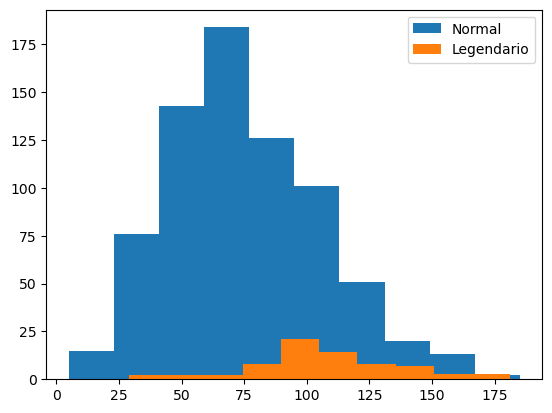

In [14]:
fig, ax = plt.subplots()
ax.hist(df[df["is_legendary"]==0]["attack"], label="Normal")
ax.hist(df[df["is_legendary"]==1]["attack"], label="Legendario")
ax.legend()
plt.show()

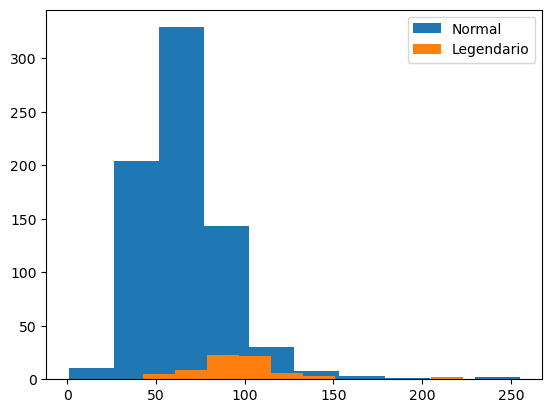

In [15]:
fig, ax = plt.subplots()
ax.hist(df[df["is_legendary"]==0]["hp"], label="Normal")
ax.hist(df[df["is_legendary"]==1]["hp"], label="Legendario")
ax.legend()
plt.show()

In [16]:
grouped_data = df.groupby('type1')[["attack","defense","sp_attack","sp_defense","speed","hp"]].mean().reset_index()
numerical_columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
scaled_data = grouped_data[numerical_columns].values
scaled_data = scaler.fit_transform(scaled_data)

# Replace the original numerical columns with scaled values
grouped_data[numerical_columns] = scaled_data
grouped_data

,type1,attack,defense,sp_attack,sp_defense,speed,hp
0,bug,0.180916,0.184290,0.154027,0.009124,0.215278,0.000000
1,dark,0.579777,0.178837,0.574401,0.266221,0.470515,0.684382
2,dragon,1.000000,0.438980,0.929143,0.873621,0.487923,1.000000
3,electric,0.196617,0.035121,0.880807,0.304749,0.690078,0.163885
4,fairy,0.000000,0.139993,0.738714,1.000000,0.000000,0.744596
5,fighting,0.836807,0.110680,0.000000,0.044999,0.230849,0.635823
6,fire,0.437709,0.133743,0.885332,0.363077,0.427815,0.519185
7,flying,0.102843,0.087663,0.797542,0.302737,1.000000,0.487590
8,ghost,0.239967,0.327587,0.760938,0.628127,0.101449,0.287430
9,grass,0.263185,0.184696,0.569772,0.272567,0.116499,0.373406


In [17]:
# Organize data into rows and columns for the subplot
rows = 6  # Number of rows
cols = 3  # Number of columns
num_charts = rows * cols

# Create a subplot layout with a 3x6 grid
fig = make_subplots(rows=rows, cols=cols, subplot_titles=grouped_data['type1'][:num_charts], specs=[[{'type': 'polar'}]*cols]*rows)

# Add radar charts to the subplot
for i, row in grouped_data.iterrows():
    row_num = i // cols + 1
    col_num = i % cols + 1
    
    trace = go.Scatterpolar(
        r=[row['attack'], row['defense'], row['sp_attack'], row['sp_defense'], row['speed'], row["hp"]],
        theta=['Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed',"hp"],
        fill='toself',
        name=row['type1']
    )
    
    fig.add_trace(trace, row=row_num, col=col_num)

    fig.update_polars(radialaxis_range=[0, 1])  # Set the maximum radius range for each subplot

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1]),
    ),
    showlegend=False,
    title="Pokemon Stats by Type (Radar Charts)",
     height=1000,  # Adjust the height as desired
    width=1200   # Adjust the width as desired
)


# Update subplot titles
for i, title in enumerate(df['type1'][:num_charts]):
    row_num = i // cols + 1
    col_num = i % cols + 1
    fig.update_xaxes(title_text=title, row=row_num, col=col_num)

# Show the combined radar charts
fig.show()

In [19]:
import random

# Ejemplo de datos de Pokémon en forma de diccionario

# Función para simular una batalla
def simulate_battle(pokemon1, pokemon2):
    power1 = (pokemon1["attack"] + pokemon1["sp_attack"]) * (pokemon1["defense"] + pokemon1["sp_defense"]) * pokemon1["speed"] * pokemon1["hp"]
    power2 = (pokemon2["attack"] + pokemon2["sp_attack"]) * (pokemon2["defense"] + pokemon2["sp_defense"]) * pokemon2["speed"] * pokemon2["hp"]
    
    if power1 > power2:
        return pokemon1
    elif power2 > power1:
        return pokemon2
    else:
        return None

# Número de simulaciones a realizar
num_simulations = 10000

# Contadores para rastrear las victorias de cada Pokémon
victories = {pokemon["type"]: 0 for pokemon in grouped_data}

# Realizar simulaciones
for _ in range(num_simulations):
    pokemon1 = random.choice(df)
    pokemon2 = random.choice(pokemon_data)
    
    winner = simulate_battle(pokemon1, pokemon2)
    if winner:
        victories[winner["type"]] += 1

# Encontrar el Pokémon con más victorias
most_victorious_pokemon = max(victories, key=victories.get)

print("Resultados de las simulaciones:")
for pokemon_type, wins in victories.items():
    print(f"Pokémon tipo {pokemon_type}: {wins} victorias")

print(f"\nEl Pokémon más victorioso es el tipo {most_victorious_pokemon}")


TypeError: string indices must be integers, not 'str'